# Загрузка необходимых библиотек

In [40]:
pip install PyPDF2 tqdm


Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install pypdf 

  Obtaining dependency information for pypdf from https://files.pythonhosted.org/packages/c9/d1/450b19bbdbb2c802f554312c62ce2a2c0d8744fe14735bc70ad2803578c7/pypdf-4.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/290.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/290.4 kB 330.3 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/290.4 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/290.4 kB 327.7 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/290.4 kB 327.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/290.4 kB 383.3 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/290.4 kB 393.8 kB/s eta 0:00:01
   -------------------- ----------------- 153.6/290.4 kB 510.2 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/290.4 kB 468.3 kB/s eta 0:00:01
   ---------------------------- --------- 215.0/290.4 kB 570.5 kB/s eta 0:00:01
   -----------

In [29]:
pip install pdfplumber

  Obtaining dependency information for pdfplumber from https://files.pythonhosted.org/packages/ee/ec/315015b6c4667d889cc14348c93e31f9fd43a6f61162b85c39e4a21018d5/pdfplumber-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy<2,>=1.23.2 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.4 MB/s eta 0:00:00
  Obtaining dependency information for pdfminer.six==20231228 from https://files.pythonhosted.org/packages/eb/9c/e46fe7502b32d7db6af6e36a9105abb93301fa1ec475b5ddcba8b35ae23a/pdfminer.six-20231228-py3-none-any.w

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [123]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import requests
import pdfplumber
from io import BytesIO
import re
from pypdf import PdfReader 
import nltk
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from collections import defaultdict

# Обработка данных

In [25]:
df = pd.read_csv("works-2024-05-08T14-57-08.csv")

C:\Users\eremisque\AppData\Local\Temp\ipykernel_26520\1346830873.py:1: DtypeWarning: Columns (82,101,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("works-2024-05-08T14-57-08.csv")


In [26]:
df.shape

(22310, 155)

In [27]:
raw_columns = "display_name,publication_date,publication_year,relevance_score,primary_location_id,primary_location_display_name,author_ids,author_names,author_institution_names,is_oa,oa_url,cited_by_count,cited_by_api_url,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,language"

In [28]:
columns = raw_columns.split(",")

In [29]:
authors = df[columns]

### Фильтрация данных. Оставляем только релевантные статьи

In [30]:
df_filtered = authors[authors["relevance_score"] > 90]
df_filtered = df_filtered[df_filtered["cited_by_count"] > 10]

In [31]:
df_filtered.shape

(799, 22)

In [32]:
df_filtered.head(3)

,display_name,publication_date,publication_year,relevance_score,primary_location_id,primary_location_display_name,author_ids,author_names,author_institution_names,is_oa,...,cited_by_api_url,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,language
0,Classifying political regimes,1996-06-01,1996,3944.9678,https://openalex.org/S76061110,Studies in comparative international development,https://openalex.org/A5006969960|https://opena...,Mike Alvarez|José Antônio Cheibub|Fernando Lim...,DePaul University|University of Pennsylvania|U...,False,...,https://api.openalex.org/works?filter=cites:W2...,32,https://openalex.org/W1509383136|https://opena...,https://openalex.org/W4294860382|https://opena...,Empirical Analysis of Political Behavior and I...,Empirical Analysis of Political Behavior and I...,Dictatorship|Politics|Independence (probabilit...,Democracy,Reduced inequalities,en
1,The Effect of Political Regime on Civil War,2008-03-06,2008,3300.4010,https://openalex.org/S20177303,Journal of conflict resolution/The Journal o...,https://openalex.org/A5080456175,James Raymond Vreeland,Yale University,False,...,https://api.openalex.org/works?filter=cites:W2...,54,https://openalex.org/W585803758|https://openal...,https://openalex.org/W2385474510|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Polity|Spanish Civil War|Dictatorship|Politics...,Democracy,"Peace, justice, and strong institutions",en
2,"A Complete Data Set of Political Regimes, 1800...",2012-11-26,2012,3232.4492,https://openalex.org/S105556297,Comparative political studies,https://openalex.org/A5015250779|https://opena...,Carles Boix|M.K. Miller|Sebastian Rosato,Princeton University|Australian National Unive...,False,...,https://api.openalex.org/works?filter=cites:W2...,85,https://openalex.org/W153593738|https://openal...,https://openalex.org/W4385993479|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Democracy|Politics|Modernization theory|Suffra...,Democracy,"Peace, justice, and strong institutions",en


### Добавление информации о странах 

In [33]:
def extract_institutions(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    institution_data = {}
    
    # Process each line
    for line in lines:
        if line.startswith('C3 '):
            # Remove the 'C3 ' label and newline character, then split on '; '
            institutions = line[3:].strip().split('; ')
            for institution in institutions:
                if ', ' in institution:
                    # Split the institution from the country using the last comma
                    name, country = institution.rsplit(', ', 1)
                    institution_data[name.strip()] = country.strip()
    
    return institution_data

# Path to the file
file_path = 'works-2024-05-08T15-11-41.txt'

# Extract data
institution_dict = extract_institutions(file_path)


In [34]:
def assign_countries_to_authors(df, institution_dict):
    # Function to process each row and determine country
    def get_countries(institutions):
        if pd.isna(institutions):
            return np.nan
        
        # Split institutions by '|', strip spaces, and fetch countries from the dictionary
        countries = [
            institution_dict.get(inst.strip(), np.nan) for inst in institutions.split('|')
        ]
        
        # Filter out any NaN values retained as strings and join with '|'
        valid_countries = [country for country in countries if country is not np.nan]
        return '|'.join(valid_countries) if valid_countries else np.nan
    
    # Apply the function to the 'author_institution_names' column and create a new 'author_country' column
    df['author_country'] = df['author_institution_names'].apply(get_countries)
    return df


# Now, call the function with the DataFrame and the dictionary
df_filtered = assign_countries_to_authors(df_filtered, institution_dict)


In [35]:
df_filtered.head(3)

,display_name,publication_date,publication_year,relevance_score,primary_location_id,primary_location_display_name,author_ids,author_names,author_institution_names,is_oa,...,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,language,author_country
0,Classifying political regimes,1996-06-01,1996,3944.9678,https://openalex.org/S76061110,Studies in comparative international development,https://openalex.org/A5006969960|https://opena...,Mike Alvarez|José Antônio Cheibub|Fernando Lim...,DePaul University|University of Pennsylvania|U...,False,...,32,https://openalex.org/W1509383136|https://opena...,https://openalex.org/W4294860382|https://opena...,Empirical Analysis of Political Behavior and I...,Empirical Analysis of Political Behavior and I...,Dictatorship|Politics|Independence (probabilit...,Democracy,Reduced inequalities,en,US|US|BR|US
1,The Effect of Political Regime on Civil War,2008-03-06,2008,3300.4010,https://openalex.org/S20177303,Journal of conflict resolution/The Journal o...,https://openalex.org/A5080456175,James Raymond Vreeland,Yale University,False,...,54,https://openalex.org/W585803758|https://openal...,https://openalex.org/W2385474510|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Polity|Spanish Civil War|Dictatorship|Politics...,Democracy,"Peace, justice, and strong institutions",en,US
2,"A Complete Data Set of Political Regimes, 1800...",2012-11-26,2012,3232.4492,https://openalex.org/S105556297,Comparative political studies,https://openalex.org/A5015250779|https://opena...,Carles Boix|M.K. Miller|Sebastian Rosato,Princeton University|Australian National Unive...,False,...,85,https://openalex.org/W153593738|https://openal...,https://openalex.org/W4385993479|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Democracy|Politics|Modernization theory|Suffra...,Democracy,"Peace, justice, and strong institutions",en,US|AU|US


In [36]:
df_filtered.shape # появилась новая колонка -- со странами 

(799, 23)

### Добавление информации про журналы (Индекс Хирша)

In [37]:
# Function to extract source number from URL, handles None and NaN
def extract_source_number(url):
    if pd.notna(url):
        return url.split("/")[-1]
    else:
        return None  # Return None for NaN or None values

# Cache to store h_index values to prevent repeated API calls
h_index_cache = {}

# Function to fetch h-index from OpenAlex API, considers None input
def fetch_h_index(source_number):
    if source_number is None:
        return None  # Skip fetching for NaN or None source numbers
    if source_number in h_index_cache:
        return h_index_cache[source_number]  # Use cached value if available
    else:
        link = f'https://api.openalex.org/sources/{source_number}'
        response = requests.get(link)
        if response.status_code == 200:
            data = response.json()
            h_index = data['summary_stats'].get('h_index', None)
            h_index_cache[source_number] = h_index  # Cache the retrieved h_index
            return h_index
        else:
            return None  # Handle cases where the API call fails

# Apply the extraction and fetching functions
df_filtered['source_number'] = df_filtered['primary_location_id'].apply(extract_source_number)
df_filtered['h_index'] = df_filtered['source_number'].apply(fetch_h_index)



In [38]:
df_filtered.head(3)

,display_name,publication_date,publication_year,relevance_score,primary_location_id,primary_location_display_name,author_ids,author_names,author_institution_names,is_oa,...,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,language,author_country,source_number,h_index
0,Classifying political regimes,1996-06-01,1996,3944.9678,https://openalex.org/S76061110,Studies in comparative international development,https://openalex.org/A5006969960|https://opena...,Mike Alvarez|José Antônio Cheibub|Fernando Lim...,DePaul University|University of Pennsylvania|U...,False,...,https://openalex.org/W4294860382|https://opena...,Empirical Analysis of Political Behavior and I...,Empirical Analysis of Political Behavior and I...,Dictatorship|Politics|Independence (probabilit...,Democracy,Reduced inequalities,en,US|US|BR|US,S76061110,89.0
1,The Effect of Political Regime on Civil War,2008-03-06,2008,3300.4010,https://openalex.org/S20177303,Journal of conflict resolution/The Journal o...,https://openalex.org/A5080456175,James Raymond Vreeland,Yale University,False,...,https://openalex.org/W2385474510|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Polity|Spanish Civil War|Dictatorship|Politics...,Democracy,"Peace, justice, and strong institutions",en,US,S20177303,176.0
2,"A Complete Data Set of Political Regimes, 1800...",2012-11-26,2012,3232.4492,https://openalex.org/S105556297,Comparative political studies,https://openalex.org/A5015250779|https://opena...,Carles Boix|M.K. Miller|Sebastian Rosato,Princeton University|Australian National Unive...,False,...,https://openalex.org/W4385993479|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Democracy|Politics|Modernization theory|Suffra...,Democracy,"Peace, justice, and strong institutions",en,US|AU|US,S105556297,170.0


In [39]:
df_filtered.to_csv('political-regimes-data.csv', index=False, header=True) # новый датафрейм

### Описательные статистики по датафрейму (нужно вручную почистить датафрейм)

In [2]:
df_filtered = pd.read_csv("political-regimes-data-filtered.csv")

#### Ключевые слова и время (для визуализации в Tableau)

In [34]:
# Split the 'keywords_display_name' column into individual keywords
df_filtered['keywords_display_name'] = df_filtered['keywords_display_name'].astype(str)  # Ensure all entries are strings
keywords_expanded = df_filtered['keywords_display_name'].str.split('|', expand=True)

# Melt the expanded dataframe so each keyword has its own row along with the original index
keywords_melted = keywords_expanded.melt(value_name='keyword')
keywords_melted = keywords_melted.dropna(subset=['keyword']).reset_index(drop=True)

# Merge the melted keywords dataframe with the original to get publication dates for each keyword
keywords_with_dates = keywords_melted.merge(df_filtered['publication_date'], left_index=True, right_index=True)

# Calculate the overall count of each keyword across all dates
keyword_counts = keywords_with_dates['keyword'].value_counts().reset_index()
keyword_counts.columns = ['keyword', 'overall_count']

# Merge to get the overall counts with the keywords and their dates
final_data = keywords_with_dates.merge(keyword_counts, on='keyword', how='left')

# Clean up to have the correct columns in the desired order
final_data = final_data[['keyword', 'publication_date', 'overall_count']]

In [33]:
final_data

,keyword,publication_date,overall_count
0,Democracy,1996-06-01,119
1,Democracy,2008-03-06,119
2,Democracy,2012-11-26,119
3,Economic Growth,1995-01-01,3
4,Governance,2006-03-01,41
...,...,...,...
782,Institutional Change,1982-11-01,17
783,Authoritarianism,2013-01-01,48
784,Political Communication,1955-02-01,2
785,Clientelism,1984-04-01,4


In [35]:
#final_data.to_csv('keywords-time-large.csv', index=False, header=True)

#### Авторы и время (для визуализации в Tableau)

In [36]:
# Split the 'author_names' column into individual authors
df_filtered['author_names'] = df_filtered['author_names'].astype(str)  # Ensure all entries are strings
authors_expanded = df_filtered['author_names'].str.split('|', expand=True)

# Melt the expanded dataframe so each author has its own row along with the original index
authors_melted = authors_expanded.melt(value_name='author')
authors_melted = authors_melted.dropna(subset=['author']).reset_index(drop=True)

# Merge the melted authors dataframe with the original to get publication dates for each author
authors_with_dates = authors_melted.merge(df_filtered['publication_date'], left_index=True, right_index=True)

# Calculate the overall count of each author across all dates
author_counts = authors_with_dates['author'].value_counts().reset_index()
author_counts.columns = ['author', 'overall_count']

# Merge to get the overall counts with the authors and their dates
final_data = authors_with_dates.merge(author_counts, on='author', how='left')

# Clean up to have the correct columns in the desired order
final_data = final_data[['author', 'publication_date', 'overall_count']]


In [37]:
final_data

,author,publication_date,overall_count
0,Mike Alvarez,1996-06-01,1
1,James Raymond Vreeland,2008-03-06,2
2,Carles Boix,2012-11-26,3
3,Adam Przeworski,1995-01-01,2
4,Fabio Méndez,2006-03-01,1
...,...,...,...
782,Suzanne Berger,1982-11-01,1
783,Dan Slater,2013-01-01,2
784,V Key,1955-02-01,1
785,Christos Lyrintzis,1984-04-01,1


In [38]:
#final_data.to_csv('authors-time-large.csv', index=False, header=True)

#### Темы и время (для визуализации в Tableau)

In [39]:
# Split the 'topics_display_name' column into individual topics
df_filtered['topics_display_name'] = df_filtered['topics_display_name'].astype(str)  # Ensure all entries are strings
topics_expanded = df_filtered['topics_display_name'].str.split('|', expand=True)

# Melt the expanded dataframe so each topic has its own row along with the original index
topics_melted = topics_expanded.melt(value_name='topic')
topics_melted = topics_melted.dropna(subset=['topic']).reset_index(drop=True)

# Merge the melted topics dataframe with the original to get publication dates for each topic
topics_with_dates = topics_melted.merge(df_filtered['publication_date'], left_index=True, right_index=True)

# Calculate the overall count of each topic across all dates
topic_counts = topics_with_dates['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'overall_count']

# Merge to get the overall counts with the topics and their dates
final_data = topics_with_dates.merge(topic_counts, on='topic', how='left')

# Clean up to have the correct columns in the desired order
final_data = final_data[['topic', 'publication_date', 'overall_count']]


In [43]:
final_data

,topic,publication_date,overall_count
0,Empirical Analysis of Political Behavior and I...,1996-06-01,38
1,Social Movements and Political Conflict Analysis,2008-03-06,143
2,Social Movements and Political Conflict Analysis,2012-11-26,143
3,Income Inequality and Poverty Dynamics,1995-01-01,12
4,Causes and Effects of Corruption,2006-03-01,22
...,...,...,...
782,Politics and Economics of Welfare State,1982-11-01,61
783,Social Movements and Political Conflict Analysis,2013-01-01,143
784,Populism in Contemporary Politics,1955-02-01,10
785,Impact of Austerity Politics in Greece and Sou...,1984-04-01,1


In [44]:
#final_data.to_csv('topics-time-large.csv', index=False, header=True)

#### Страны

In [3]:
# Splitting the 'author_country' entries, flattening them, and counting each country
country_counts = df_filtered['author_country'].str.split('|').explode().value_counts()

# Creating a DataFrame for the counts
country_summary = pd.DataFrame(country_counts).reset_index()
country_summary.columns = ['Country', 'Count']

country_summary


,Country,Count
0,US,421
1,GB,105
2,DE,58
3,CA,30
4,SE,29
5,DK,20
6,RU,20
7,NL,19
8,AU,18
9,FR,14


In [ ]:
country_summary.to_csv('country-large.csv', index=False, header=True)

#### Ключевые слова

In [6]:
# Expand the DataFrame by splitting each row's string and then exploding it into separate rows
df_expanded = df_filtered['keywords_display_name'].str.split('|').explode()

# Count the occurrences of each word
word_counts = df_expanded.value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

In [7]:
word_counts[word_counts["Count"] > 1]

,Word,Count
0,Democracy,138
1,Governance,63
2,Authoritarianism,56
3,Political Economy,47
4,Party Polarization,35
...,...,...
121,State Sovereignty,2
122,Rhetoric,2
123,Environmental Refugees,2
124,Arctic,2


### Создаём матрицы на основе большого датасета (для визуализации)

### Выше данные для разведочного анализа. Нужно максимально заполнить у них NaN (или удалить) и сделать по ним визуализации. Далее -- работа с текстами статей

### Парсинг текста статей

#### Автоматический сбор данных

In [41]:
import pandas as pd
import PyPDF2
import requests
import io
from tqdm import tqdm  # tqdm is useful for displaying a progress bar

# Function to extract text from PDF given a URL
def extract_text_from_pdf(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            f = io.BytesIO(response.content)
            reader = PyPDF2.PdfReader(f)
            pages = reader.pages
            text = "".join([page.extract_text() for page in pages if page.extract_text()])
            return text
        else:
            return None  # If response is not successful
    except Exception as e:
        print(f"Failed to process PDF from {url}: {e}")
        return None  # In case of any errors during PDF processing

# Ensure that your DataFrame has the correct column for URLs
if 'oa_url' in df_filtered.columns:
    # Initialize the new column with empty strings or you could use None
    df_filtered['article_text'] = ""

    # Iterate through each row in the DataFrame
    for index, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0]):
        url = row['oa_url']
        # Check if the URL is a non-empty string and not NaN
        if pd.notna(url) and url != "":
            # Extract text from PDF and assign it to the new column
            df_filtered.at[index, 'article_text'] = extract_text_from_pdf(url)
else:
    print("DataFrame does not contain the column 'oa_url'. Please check the DataFrame structure.")


  1%|          | 7/787 [00:04<07:09,  1.82it/s]

Failed to process PDF from https://www.cogitatiopress.com/politicsandgovernance/article/download/1214/1214: Cannot read an empty file


  6%|▋         | 50/787 [01:14<32:19,  2.63s/it]

Failed to process PDF from https://link.springer.com/book/10.1007/978-3-030-03125-1?sv1=affiliate&sv_campaign_id=101248&awc=26429_1715278626_a0e26708865453988d713f096584e0d3&utm_medium=affiliate&utm_source=awin&utm_campaign=CONR_BOOKS_ECOM_DE_PBOK_ALWYS_DEEPLINK&utm_content=textlink&utm_term=101248: EOF marker not found


 20%|██        | 160/787 [04:08<17:55,  1.72s/it]

Failed to process PDF from https://dro.dur.ac.uk/7524/1/7524.pdf: EOF marker not found


 24%|██▍       | 188/787 [04:34<12:35,  1.26s/it]

Failed to process PDF from https://acde.crawford.anu.edu.au/sites/default/files/publication/acde_crawford_anu_edu_au/2016-05/2016-02_jha_gupta_democracy_redistribution_2_jan16.pdf: ('Connection broken: IncompleteRead(17579 bytes read, 335933 more expected)', IncompleteRead(17579 bytes read, 335933 more expected))


 43%|████▎     | 342/787 [06:18<05:17,  1.40it/s]

Failed to process PDF from http://repository.bilkent.edu.tr/bitstream/11693/37789/1/Courts%20in%20semi-democratic-authoritarian%20regimes%20The%20judicialization%20of%20Turkish%20%28and%20Iranian%29%20politics.pdf: EOF marker not found


 52%|█████▏    | 413/787 [07:41<10:09,  1.63s/it]

Failed to process PDF from https://helda.helsinki.fi/bitstream/10138/317857/1/Sirotkina_Zavadskaya_manuscript_270419_FINAL.pdf: EOF marker not found


 57%|█████▋    | 447/787 [09:08<31:15,  5.52s/it]

Failed to process PDF from https://doi.org/10.1353/wp.0.0021: HTTPSConnectionPool(host='muse.jhu.edu', port=443): Max retries exceeded with url: /article/256025 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000257A424E090>, 'Connection to muse.jhu.edu timed out. (connect timeout=None)'))


 61%|██████▏   | 483/787 [09:48<09:31,  1.88s/it]

Failed to process PDF from https://www.ssoar.info/ssoar/bitstream/document/84943/1/ssoar-democratization-2004-5-merkel-Embedded_and_defective_democracies.pdf: ('Connection broken: IncompleteRead(516096 bytes read, 627707 more expected)', IncompleteRead(516096 bytes read, 627707 more expected))


 66%|██████▌   | 518/787 [10:05<02:50,  1.58it/s]

Failed to process PDF from https://ink.library.smu.edu.sg/soss_research/1170: EOF marker not found


 70%|███████   | 551/787 [10:22<02:42,  1.46it/s]

Failed to process PDF from https://helda.helsinki.fi/bitstream/10138/223807/1/neopatrimonnalism_e_ed_revised_20150706.pdf: EOF marker not found


 80%|████████  | 630/787 [12:26<02:48,  1.07s/it]

Failed to process PDF from http://sro.sussex.ac.uk/id/eprint/60217/1/eastschooling_dec8_2015.pdf: EOF marker not found


 93%|█████████▎| 728/787 [14:05<00:24,  2.43it/s]

Failed to process PDF from https://dro.dur.ac.uk/13039/1/13039.pdf: EOF marker not found


 98%|█████████▊| 771/787 [14:30<00:11,  1.44it/s]

Failed to process PDF from https://www.cambridge.org/core/services/aop-cambridge-core/content/view/3A9711B9C9A38CCFD7C31AD5D90344FA/S0007123414000106a.pdf/div-class-title-juking-the-stats-authoritarian-information-problems-in-china-div.pdf: ('Connection aborted.', ConnectionResetError(10054, 'Удаленный хост принудительно разорвал существующее подключение', None, 10054, None))


100%|██████████| 787/787 [14:35<00:00,  1.11s/it]


#### Не все данные корректно собраны. Требуется ручная обработка

In [2]:
# df_filtered = pd.read_csv("political-regimes-data-text.csv")

In [4]:
df_text = df_filtered[df_filtered["is_oa"] == True]

In [170]:
df_text[df_text["article_text"].isna() == True].shape

(18, 25)

In [168]:
#df_text[df_text["article_text"].isna() == True].iloc[[18]]

In [164]:
###reader = PdfReader("div-class-title-juking-the-stats-authoritarian-information-problems-in-china-div.pdf")
###text = ""
###for page in reader.pages:
###    text += page.extract_text() + "\n"

In [165]:
#df_text["article_text"].loc[770] = text

C:\Users\eremisque\AppData\Local\Temp\ipykernel_11352\3928616285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["article_text"].loc[770] = text


In [176]:
df_text_full = df_text[df_text["article_text"].notna()]

In [179]:
df_text_full[df_text_full["article_text"].isna() == True].shape[0] # удалили все статьи без текста

0

In [180]:
#df_text_full.to_csv('political-regimes-data-text-full.csv', index=False, header=True)

### Подготовка текста к NLP

In [181]:
# Download the set of stop-words from nltk
nltk.download('stopwords')

# Get English stop-words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove unwanted characters such as new lines and tabs
    text = re.sub(r'\s+', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stop-words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eremisque\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
# Apply the clean_text function to the article_text column
df_text_full['cleaned_text'] = df_text_full['article_text'].apply(clean_text)


C:\Users\eremisque\AppData\Local\Temp\ipykernel_11352\1119167943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text_full['cleaned_text'] = df_text_full['article_text'].apply(clean_text)


In [183]:
df_text_full['cleaned_text']

3      american economic association political regime...
6      politics governance (issn: 2183–2463) 2018, vo...
9      wilfrid laurier univ ersity wilfrid laurier un...
29     page intentionally left blank rule law: politi...
30     public choice (2011) 146: 93–115 doi 10.1007/s...
                             ...                        
759    1 introduction five snapshots contention 25ja...
764    epru economic policy research unit institute e...
770    b.j.pol.s. 46, 11–29 copyright rcambridge univ...
776    e nemy wi thin personal rule, coups, civil war...
779    jørgen møller, svend-erik skaaning jakob tolst...
Name: cleaned_text, Length: 145, dtype: object

In [185]:
df_text_full['article_text']

3      American Economic Association\nPolitical Regim...
6      Politics and Governance (ISSN: 2183–2463)\n201...
9      Wilfrid Laurier Univ ersity Wilfrid Laurier Un...
29     This page intentionally left blank rule by law...
30     Public Choice (2011) 146: 93–115\nDOI 10.1007/...
                             ...                        
759    1\nIntroduction\nFive Snapshots of Contention\...
764    EPRU \n \nEconomic Policy Research Unit \nInst...
770    B.J.Pol.S. 46, 11–29 Copyright rCambridge Univ...
776    The e nemy Wi Thin\nPersonal Rule, Coups, and ...
779    Jørgen Møller, Svend-Erik Skaaning\nand Jakob ...
Name: article_text, Length: 145, dtype: object

In [189]:
df_text_full.drop("article_text", axis=1, inplace=True)

C:\Users\eremisque\AppData\Local\Temp\ipykernel_11352\3730803041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text_full.drop("article_text", axis=1, inplace=True)


In [190]:
df_text_full

,display_name,publication_date,publication_year,language,relevance_score,primary_location_id,primary_location_display_name,h_index,author_ids,author_names,...,cited_by_api_url,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,cleaned_text
3,Political Regimes and Economic Growth,1995-01-01,1995,en,3100.897500,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258.0,https://openalex.org/A5020257111|https://opena...,Adam Przeworski|Fernando Limongi|Salvador Giner,...,https://api.openalex.org/works?filter=cites:W2...,72,https://openalex.org/W598180937|https://openal...,https://openalex.org/W2752365535|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Dictatorship|Authoritarianism|Property rights|...,Economic Growth,"Peace, justice, and strong institutions",american economic association political regime...
6,Regimes of the World (RoW): Opening New Avenue...,2018-03-19,2018,en,1977.563000,https://openalex.org/S2764872494,Politics and governance,36.0,https://openalex.org/A5074528994|https://opena...,Anna Lührmann|Marcus Tannenberg|Staffan I. Lin...,...,https://api.openalex.org/works?filter=cites:W2...,0,NaN,https://openalex.org/W2944277854|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Autocracy|Authoritarianism|Politics|Operationa...,Electoral Systems|Democracy,"Peace, justice, and strong institutions","politics governance (issn: 2183–2463) 2018, vo..."
9,"Human Dignity, Human Rights, and Political Reg...",1986-09-01,1986,en,1621.728100,https://openalex.org/S176007004,The American political science review,346.0,https://openalex.org/A5026824298|https://opena...,Rhoda E. Howard|Jack Donnelly,...,https://api.openalex.org/works?filter=cites:W2...,20,https://openalex.org/W590377436|https://openal...,https://openalex.org/W2109916127|https://opena...,Theoretical Perspectives on Global Justice|Dig...,Theoretical Perspectives on Global Justice,Dignity|Human rights|Autonomy|Politics|Communi...,Multiculturalism,"Peace, justice, and strong institutions",wilfrid laurier univ ersity wilfrid laurier un...
29,Rule by Law: The Politics of Courts in Authori...,2008-01-01,2008,en,972.352300,https://openalex.org/S4306462995,Cambridge University Press eBooks,482.0,NaN,Tom Ginsburg|Tamir Moustafa,...,https://api.openalex.org/works?filter=cites:W1...,0,NaN,https://openalex.org/W2748952813|https://opena...,International Criminal Law and Human Rights Ob...,International Criminal Law and Human Rights Ob...,Authoritarianism|Politics|Law|Political scienc...,Legal Semiotics,"Peace, justice, and strong institutions",page intentionally left blank rule law: politi...
30,"Political regime change, economic liberalizati...",2010-01-13,2010,en,968.652650,https://openalex.org/S7424199,Public choice,146.0,https://openalex.org/A5046206731|https://opena...,Richard Jong‐A‐Pin|Jakob de Haan,...,https://api.openalex.org/works?filter=cites:W2...,25,https://openalex.org/W1513778549|https://opena...,https://openalex.org/W2170969019|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Autocracy|Polity|Economics|Liberalization|Demo...,Political Economy,Decent work and economic growth,public choice (2011) 146: 93–115 doi 10.1007/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Egypt in a Time of Revolution,2017-04-03,2017,en,93.256560,NaN,Cambridge University Press eBooks,482.0,https://openalex.org/A5012604830,Neil Ketchley,...,https://api.openalex.org/works?filter=cites:W2...,227,https://openalex.org/W80269700|https://openale...,https://openalex.org/W3203317101|https://opena...,Socio-Political Dynamics in Lebanon|Israeli-Pa...,Socio-Political Dynamics in Lebanon,Authoritarianism|Contentious politics|Politics..

In [191]:
df_text_full.to_csv('political-regimes-data-text-full.csv', index=False, header=True)

### Обработка NER

In [91]:
df_wd = pd.read_csv("political-regimes-ner-repaired-before-match.csv")

In [90]:
df_words = pd.read_csv("words - words.csv")

In [106]:
df_words = df_words[df_words["count-documents"] > 3]

In [107]:
# Filtering df_wd based on df_words
filtered_df = df_wd[df_wd['NE-text'].isin(df_words['text'])]

In [108]:
filtered_df[filtered_df["NE-text"] == "organisation for economic co-operation and development"] # проверяем всё ли на месте 

,display_name,publication_date,publication_year,language,relevance_score,primary_location_id,primary_location_display_name,h_index,author_ids,author_names,...,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,NE-text,NE-type,NE-count
719,"Postindustrial Pressures, Political Regime Shi...",2004-12-01,2004,en,918.262630,https://openalex.org/S60875592,Journal of East Asian Studies,41,https://openalex.org/A5067225500,Ito Peng,...,https://openalex.org/W593032530|https://openal...,https://openalex.org/W597967970|https://openal...,Politics and Economics of Welfare State|Interg...,Politics and Economics of Welfare State,Post-industrial society|Welfare|Globalization|...,Institutional Change,Gender equality,organisation for economic co-operation and dev...,ORG,4
4858,"Development Cycles, Political Regimes and Inte...",2005-01-01,2005,en,600.545040,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258,https://openalex.org/A5056915671,Andrés Solimano,...,https://openalex.org/W615144606|https://openal...,https://openalex.org/W2221881225|https://opena...,Immigrant Entrepreneurship in Advanced Economies,Immigrant Entrepreneurship in Advanced Economies,Emigration|Politics|Immigration|Development ec...,NaN,Reduced inequalities,organisation for economic co-operation and dev...,ORG,6
5051,Labor Immigration Policies in High-Income Coun...,2018-01-02,2018,en,582.885500,https://openalex.org/S9231424,The Journal of legal studies/The journal o...,119,https://openalex.org/A5052600798,Martin Ruhs,...,https://openalex.org/W432221418|https://openal...,https://openalex.org/W2476112270|https://opena...,Migration Networks and Impacts on Labor Market...,Migration Networks and Impacts on Labor Market,Capitalism|Openness to experience|Economics|Im...,Immigration,Reduced inequalities,organisation for economic co-operation and dev...,ORG,1
5503,"Poverty, changing political regimes, and socia...",2017-01-01,2017,en,526.088600,https://openalex.org/S4210201284,Working Paper Series,26,https://openalex.org/A5077001466,Isaac Chinyoka,...,https://openalex.org/W655695867|https://openal...,https://openalex.org/W4226058997|https://opena...,Struggle for National Identity in Zimbabwean H...,Struggle for National Identity in Zimbabwean H...,Poverty|Subsidy|Cash transfers|Politics|Econom...,Zimbabwe,No poverty,organisation for economic co-operation and dev...,ORG,1
6196,The Electoral Politics of Growth Regimes,2019-06-18,2019,en,414.265870,https://openalex.org/S173657377,Perspectives on politics,152,https://openalex.org/A5027025863,Peter A. Hall,...,https://openalex.org/W40396895|https://openale...,https://openalex.org/W3185855378|https://opena...,Politics and Economics of Welfare State|Financ...,Politics and Economics of Welfare State,Modernization theory|Politics|Democracy|Libera...,Political Economy,NaN,organisation for economic co-operation and dev...,ORG,7
8263,(Re)theorizing the Politics of Bottled Water: ...,2019-03-30,2019,en,263.710630,https://openalex.org/S134216166,Water,114,https://openalex.org/A5019786838,Raul Pacheco‐Vega,...,https://openalex.org/W601023076|https://openal...,https://openalex.org/W4306847656|https://opena...,Politics and Poetics of Water Infrastructure|M...,Politics and Poetics of Water Infrastructure,Bottled water|Politics|Context (archaeology)|C...,Water Privatization,NaN,organisation for economic co-operation and dev...,ORG,1
10714,Preferences and Power in the European Communit...,1993-12-01,1993,en,187.890780,https://openalex.org/S122406424,Journal of common market studies,129,https://openalex.org/A5026129332,Andrew Moravcsik,...,https://openalex.org/W155905777|https://openal...,https://openalex.org/W2748952813|https://opena...,European Integration and Governance Dynamics|I...,European Integration and Governance Dynamics,Power (physics)|Political science|Sociology|Ph...,Governance|normative power|European Integrat

In [109]:
filtered_df.shape

(7231, 27)

#### Очищаем от дубликатов

In [111]:
# Define a function to process each group
def remove_duplicates(group):
    # Get unique pairs of NE-text and NE-type
    unique_pairs = group.drop_duplicates(subset=['NE-text', 'NE-type'])
    return unique_pairs

# Group by 'display_name' and apply the function
result_df = filtered_df.groupby('display_name').apply(remove_duplicates).reset_index(drop=True)


In [112]:
filtered_df.shape # в наших данных не было дубликатов. Отлично!

(7231, 27)

In [113]:
filtered_df

,display_name,publication_date,publication_year,language,relevance_score,primary_location_id,primary_location_display_name,h_index,author_ids,author_names,...,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,NE-text,NE-type,NE-count
2,Political Regimes and Economic Growth,1995-01-01,1995,en,3100.897500,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258,https://openalex.org/A5020257111|https://opena...,Adam Przeworski|Fernando Limongi|Salvador Giner,...,https://openalex.org/W598180937|https://openal...,https://openalex.org/W2752365535|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Dictatorship|Authoritarianism|Property rights|...,Economic Growth,"Peace, justice, and strong institutions",democratic,NORP,3
5,Political Regimes and Economic Growth,1995-01-01,1995,en,3100.897500,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258,https://openalex.org/A5020257111|https://opena...,Adam Przeworski|Fernando Limongi|Salvador Giner,...,https://openalex.org/W598180937|https://openal...,https://openalex.org/W2752365535|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Dictatorship|Authoritarianism|Property rights|...,Economic Growth,"Peace, justice, and strong institutions",sao paulo,GPE,1
6,Political Regimes and Economic Growth,1995-01-01,1995,en,3100.897500,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258,https://openalex.org/A5020257111|https://opena...,Adam Przeworski|Fernando Limongi|Salvador Giner,...,https://openalex.org/W598180937|https://openal...,https://openalex.org/W2752365535|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Dictatorship|Authoritarianism|Property rights|...,Economic Growth,"Peace, justice, and strong institutions",brazil,GPE,8
7,Political Regimes and Economic Growth,1995-01-01,1995,en,3100.897500,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258,https://openalex.org/A5020257111|https://opena...,Adam Przeworski|Fernando Limongi|Salvador Giner,...,https://openalex.org/W598180937|https://openal...,https://openalex.org/W2752365535|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Dictatorship|Authoritarianism|Property rights|...,Economic Growth,"Peace, justice, and strong institutions",socialists,NORP,1
11,Political Regimes and Economic Growth,1995-01-01,1995,en,3100.897500,https://openalex.org/S4306463716,Palgrave Macmillan UK eBooks,258,https://openalex.org/A5020257111|https://opena...,Adam Przeworski|Fernando Limongi|Salvador Giner,...,https://openalex.org/W598180937|https://openal...,https://openalex.org/W2752365535|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Dictatorship|Authoritarianism|Property rights|...,Economic Growth,"Peace, justice, and strong institutions",chile,GPE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21965,International Influences and Democratic Regres...,2016-01-20,2016,en,90.945305,https://openalex.org/S29411750,Government and opposition,70,https://openalex.org/A5027884146|https://opena...,Jørgen Møller|Svend-Erik Skaaning|Jakob Tolstrup,...,https://openalex.org/W52635266|https://openale...,https://openalex.org/W2067400826|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Autocracy|Democracy|Politics|Political economy...,Democracy,"Peace, justice, and strong institutions",liberalism,POL SCHOOLS,1
21966,International Influences and Democratic Regres...,2016-01-20,2016,en,90.945305,https://openalex.org/S29411750,Government and opposition,70,https://openalex.org/A5027884146|https://opena...,Jørgen Møller|Svend-Erik Skaaning|Ja

#### Собираем named entities в одну строчку

In [117]:
# Define a function to concatenate names and types while preserving other columns
def concat_names_types(group):
    # We assume all other columns have the same value within each group
    # Concatenate 'NE-text' and 'NE-type' columns
    names = '|'.join(group['NE-text'])
    types = '|'.join(group['NE-type'])
    
    # Retain one instance of the remaining columns, assuming they are identical
    result = group.iloc[0].copy()
    result['NE-text'] = names
    result['NE-type'] = types
    return result

# Group by 'display_name', apply the function and reset the index
result_df = filtered_df.groupby('display_name').apply(concat_names_types).reset_index(drop=True)



In [121]:
result_df = result_df.drop("NE-count", axis=1)

In [122]:
result_df

,display_name,publication_date,publication_year,language,relevance_score,primary_location_id,primary_location_display_name,h_index,author_ids,author_names,...,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,NE-text,NE-type
0,(Re)theorizing the Politics of Bottled Water: ...,2019-03-30,2019,en,263.710630,https://openalex.org/S134216166,Water,114,https://openalex.org/A5019786838,Raul Pacheco‐Vega,...,74,https://openalex.org/W601023076|https://openal...,https://openalex.org/W4306847656|https://opena...,Politics and Poetics of Water Infrastructure|M...,Politics and Poetics of Water Infrastructure,Bottled water|Politics|Context (archaeology)|C...,Water Privatization,NaN,mexico|united nations|mexican|canadian|italy|s...,GPE|ORG|NORP|NORP|GPE|GPE|GPE|NORP|NORP|GPE|GP...
1,A New Electoral Victory for the ‘Pro-Islamists...,2007-12-01,2007,en,96.717180,https://openalex.org/S38590382,South European society & politics,57,https://openalex.org/A5062791843,Alı Çarkoğlu,...,6,https://openalex.org/W1561696213|https://opena...,https://openalex.org/W3131404004|https://opena...,Transformation of Political Landscape in Turke...,Transformation of Political Landscape in Turkey,Victory|Parliament|Politics|Democracy|Turkish|...,Party Polarization|Democratization,"Peace, justice, and strong institutions",justice development party|turkey|south europea...,ORG|GPE|NORP|NORP|NORP|NORP|NORP|NORP|ORG|NORP...
2,A Theory of Political Transitions,2001-09-01,2001,en,159.424240,https://openalex.org/S23254222,The American economic review,493,https://openalex.org/A5012301204|https://opena...,Daron Acemoğlu|James A. Robinson,...,20,https://openalex.org/W1513281941|https://opena...,https://openalex.org/W2946214509|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Elite|Economics|Incentive|CONTEST|Democracy|Po...,Election Effects,No poverty,argentina|brazil|peru|france|venezuela|latin a...,GPE|GPE|GPE|GPE|GPE|LOC|POL REGIMES|POL REGIME...
3,A Theory of Post-Civil War Democratization,2002-10-01,2002,en,115.118286,https://openalex.org/S64175637,Journal of theoretical politics,76,https://openalex.org/A5034893749|https://opena...,Léonard Wantchékon|Zvika Neeman,...,8,https://openalex.org/W2004838156|https://opena...,https://openalex.org/W2104443205|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Democratization|Expropriation|Status quo|Democ...,Democracy,"Peace, justice, and strong institutions",jerusalem|el salvador|liberia|algeria|guatemal...,GPE|GPE|GPE|GPE|GPE|GPE|GPE|GPE|GPE|ORG|NORP|G...
4,A political economy of the Middle East,2008-05-01,2008,en,174.577580,https://openalex.org/S2764375719,Choice/Choice reviews,520,NaN,Melani Cammett,...,0,NaN,https://openalex.org/W2380496087|https://opena...,Comparative Analysis of Networking Dynamics in...,Comparative Analysis of Networking Dynamics in...,Middle East|Politics|Political science|Economy...,Emiratisation,Zero hunger,arab|islam|middle east|islamist|military|mass ...,NORP|NORP|LOC|NORP|POL REGIMES|POL REGIMES|POL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,War Makes the Regime: Regional Rebellions and ...,2019-12-13,2019,en,173.393070,https://openalex.org/S95691132,British journal of political science,160,https://openalex.org/A5065625381|https://opena...,Ferdinand Eibl|Steffen Hertog|Dan Slater,...,93,https://openalex.org/W150412712|https://openal...,https://openalex.org/W2259745791|https://opena...,Democratization and Decentralization in Indone...,Democratization and Decentralization in Indonesia,Militarization|Authoritarianism|Argument (comp...,Authoritarianism,"Peace, justice, and strong institutions",southeast asia|latin american|linear|european|...,LOC|NORP|ORG|NORP|LOC|LOC|NORP|EVENT|GPE|NORP|...
141,W

In [130]:
# Initialize an empty DataFrame to hold the results
word_counts = pd.DataFrame(columns=['Name', 'Type', 'Count'])

# Iterate over each row to process 'NE-text' and 'NE-type' simultaneously
for _, row in result_df.iterrows():
    names = row['NE-text'].split('|')
    types = row['NE-type'].split('|')
    
    # Create a DataFrame for each row's data
    temp_df = pd.DataFrame({
        'Name': names,
        'Type': types
    })
    
    # Append to the main DataFrame
    word_counts = pd.concat([word_counts, temp_df], ignore_index=True)

# Group by 'Name' and 'Type' and count occurrences
word_counts_df = word_counts.groupby(['Name', 'Type']).size().reset_index(name='Count')



In [132]:
word_counts_df.sort_values(by='Count', ascending=False)

,Name,Type,Count
312,row,POL INDEXES,135
99,democracy,POL REGIMES,128
81,comparative,POL METHODS,122
373,transition,POL REGIMES,117
122,elite,POL REGIMES,106
...,...,...,...
96,czechoslovakia,ORG,2
3,africa,PERSON,2
2,africa,NORP,2
66,chile,PERSON,2


In [1]:
#result_df.to_csv('political-regimes-ner-repaired-after-match.csv', index=False, header=True)

NameError: name 'result_df' is not defined

In [148]:
result_df

,display_name,publication_date,publication_year,language,relevance_score,primary_location_id,primary_location_display_name,h_index,author_ids,author_names,...,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,NE-text,NE-type
0,(Re)theorizing the Politics of Bottled Water: ...,2019-03-30,2019,en,263.710630,https://openalex.org/S134216166,Water,114,https://openalex.org/A5019786838,Raul Pacheco‐Vega,...,74,https://openalex.org/W601023076|https://openal...,https://openalex.org/W4306847656|https://opena...,Politics and Poetics of Water Infrastructure|M...,Politics and Poetics of Water Infrastructure,Bottled water|Politics|Context (archaeology)|C...,Water Privatization,NaN,mexico|united nations|mexican|canadian|italy|s...,GPE|ORG|NORP|NORP|GPE|GPE|GPE|NORP|NORP|GPE|GP...
1,A New Electoral Victory for the ‘Pro-Islamists...,2007-12-01,2007,en,96.717180,https://openalex.org/S38590382,South European society & politics,57,https://openalex.org/A5062791843,Alı Çarkoğlu,...,6,https://openalex.org/W1561696213|https://opena...,https://openalex.org/W3131404004|https://opena...,Transformation of Political Landscape in Turke...,Transformation of Political Landscape in Turkey,Victory|Parliament|Politics|Democracy|Turkish|...,Party Polarization|Democratization,"Peace, justice, and strong institutions",justice development party|turkey|south europea...,ORG|GPE|NORP|NORP|NORP|NORP|NORP|NORP|ORG|NORP...
2,A Theory of Political Transitions,2001-09-01,2001,en,159.424240,https://openalex.org/S23254222,The American economic review,493,https://openalex.org/A5012301204|https://opena...,Daron Acemoğlu|James A. Robinson,...,20,https://openalex.org/W1513281941|https://opena...,https://openalex.org/W2946214509|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Elite|Economics|Incentive|CONTEST|Democracy|Po...,Election Effects,No poverty,argentina|brazil|peru|france|venezuela|latin a...,GPE|GPE|GPE|GPE|GPE|LOC|POL REGIMES|POL REGIME...
3,A Theory of Post-Civil War Democratization,2002-10-01,2002,en,115.118286,https://openalex.org/S64175637,Journal of theoretical politics,76,https://openalex.org/A5034893749|https://opena...,Léonard Wantchékon|Zvika Neeman,...,8,https://openalex.org/W2004838156|https://opena...,https://openalex.org/W2104443205|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Democratization|Expropriation|Status quo|Democ...,Democracy,"Peace, justice, and strong institutions",jerusalem|el salvador|liberia|algeria|guatemal...,GPE|GPE|GPE|GPE|GPE|GPE|GPE|GPE|GPE|ORG|NORP|G...
4,A political economy of the Middle East,2008-05-01,2008,en,174.577580,https://openalex.org/S2764375719,Choice/Choice reviews,520,NaN,Melani Cammett,...,0,NaN,https://openalex.org/W2380496087|https://opena...,Comparative Analysis of Networking Dynamics in...,Comparative Analysis of Networking Dynamics in...,Middle East|Politics|Political science|Economy...,Emiratisation,Zero hunger,arab|islam|middle east|islamist|military|mass ...,NORP|NORP|LOC|NORP|POL REGIMES|POL REGIMES|POL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,War Makes the Regime: Regional Rebellions and ...,2019-12-13,2019,en,173.393070,https://openalex.org/S95691132,British journal of political science,160,https://openalex.org/A5065625381|https://opena...,Ferdinand Eibl|Steffen Hertog|Dan Slater,...,93,https://openalex.org/W150412712|https://openal...,https://openalex.org/W2259745791|https://opena...,Democratization and Decentralization in Indone...,Democratization and Decentralization in Indonesia,Militarization|Authoritarianism|Argument (comp...,Authoritarianism,"Peace, justice, and strong institutions",southeast asia|latin american|linear|european|...,LOC|NORP|ORG|NORP|LOC|LOC|NORP|EVENT|GPE|NORP|...
141,W

#### Named entity recognition и время (для визуализации в Tableau)

In [46]:
# Split the 'NE_text' column into individual named entities
result_df['NE_text'] = result_df['NE_text'].astype(str)  # Ensure all entries are strings
ner_expanded = result_df['NE_text'].str.split('|', expand=True)

# Melt the expanded dataframe so each named entity has its own row along with the original index
ner_melted = ner_expanded.melt(value_name='named_entity')
ner_melted = ner_melted.dropna(subset=['named_entity']).reset_index(drop=True)

# Merge the melted named entities dataframe with the original to get publication dates for each entity
ner_with_dates = ner_melted.merge(result_df['publication_date'], left_index=True, right_index=True)

# Calculate the overall count of each named entity across all dates
ner_counts = ner_with_dates['named_entity'].value_counts().reset_index()
ner_counts.columns = ['named_entity', 'overall_count']

# Merge to get the overall counts with the named entities and their dates
final_data = ner_with_dates.merge(ner_counts, on='named_entity', how='left')

# Clean up to have the correct columns in the desired order
final_data = final_data[['named_entity', 'publication_date', 'overall_count']]


In [47]:
final_data

,named_entity,publication_date,overall_count
0,mexico,2019-03-30,3
1,justice development party,2007-12-01,1
2,argentina,2001-09-01,4
3,jerusalem,2002-10-01,1
4,arab,2008-05-01,1
...,...,...,...
140,southeast asia,2019-12-13,2
141,russia,2005-11-01,7
142,europe,1994-01-01,5
143,european,2017-03-24,11


In [48]:
final_data.to_csv('ner-time-small.csv', index=False, header=True)

### Создаём матрицы на основе новых данных

In [2]:
result_df = pd.read_csv("political-regimes-ner-repaired-after-match.csv")

In [5]:
result_df

,display_name,publication_date,publication_year,language,relevance_score,primary_location_id,primary_location_display_name,h_index,author_ids,author_names,...,referenced_works_count,referenced_works,related_works,topics_display_name,primary_topic_display_name,concepts_display_name,keywords_display_name,sustainable_development_goals_display_name,NE-text,NE-type
0,(Re)theorizing the Politics of Bottled Water: ...,2019-03-30,2019,en,263.710630,https://openalex.org/S134216166,Water,114,https://openalex.org/A5019786838,Raul Pacheco‐Vega,...,74,https://openalex.org/W601023076|https://openal...,https://openalex.org/W4306847656|https://opena...,Politics and Poetics of Water Infrastructure|M...,Politics and Poetics of Water Infrastructure,Bottled water|Politics|Context (archaeology)|C...,Water Privatization,NaN,mexico|united nations|mexican|canadian|italy|s...,GPE|ORG|NORP|NORP|GPE|GPE|GPE|NORP|NORP|GPE|GP...
1,A New Electoral Victory for the ‘Pro-Islamists...,2007-12-01,2007,en,96.717180,https://openalex.org/S38590382,South European society & politics,57,https://openalex.org/A5062791843,Alı Çarkoğlu,...,6,https://openalex.org/W1561696213|https://opena...,https://openalex.org/W3131404004|https://opena...,Transformation of Political Landscape in Turke...,Transformation of Political Landscape in Turkey,Victory|Parliament|Politics|Democracy|Turkish|...,Party Polarization|Democratization,"Peace, justice, and strong institutions",justice development party|turkey|south europea...,ORG|GPE|NORP|NORP|NORP|NORP|NORP|NORP|ORG|NORP...
2,A Theory of Political Transitions,2001-09-01,2001,en,159.424240,https://openalex.org/S23254222,The American economic review,493,https://openalex.org/A5012301204|https://opena...,Daron Acemoğlu|James A. Robinson,...,20,https://openalex.org/W1513281941|https://opena...,https://openalex.org/W2946214509|https://opena...,Income Inequality and Poverty Dynamics|Causes ...,Income Inequality and Poverty Dynamics,Elite|Economics|Incentive|CONTEST|Democracy|Po...,Election Effects,No poverty,argentina|brazil|peru|france|venezuela|latin a...,GPE|GPE|GPE|GPE|GPE|LOC|POL REGIMES|POL REGIME...
3,A Theory of Post-Civil War Democratization,2002-10-01,2002,en,115.118286,https://openalex.org/S64175637,Journal of theoretical politics,76,https://openalex.org/A5034893749|https://opena...,Léonard Wantchékon|Zvika Neeman,...,8,https://openalex.org/W2004838156|https://opena...,https://openalex.org/W2104443205|https://opena...,Social Movements and Political Conflict Analys...,Social Movements and Political Conflict Analysis,Democratization|Expropriation|Status quo|Democ...,Democracy,"Peace, justice, and strong institutions",jerusalem|el salvador|liberia|algeria|guatemal...,GPE|GPE|GPE|GPE|GPE|GPE|GPE|GPE|GPE|ORG|NORP|G...
4,A political economy of the Middle East,2008-05-01,2008,en,174.577580,https://openalex.org/S2764375719,Choice/Choice reviews,520,NaN,Melani Cammett,...,0,NaN,https://openalex.org/W2380496087|https://opena...,Comparative Analysis of Networking Dynamics in...,Comparative Analysis of Networking Dynamics in...,Middle East|Politics|Political science|Economy...,Emiratisation,Zero hunger,arab|islam|middle east|islamist|military|mass ...,NORP|NORP|LOC|NORP|POL REGIMES|POL REGIMES|POL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,War Makes the Regime: Regional Rebellions and ...,2019-12-13,2019,en,173.393070,https://openalex.org/S95691132,British journal of political science,160,https://openalex.org/A5065625381|https://opena...,Ferdinand Eibl|Steffen Hertog|Dan Slater,...,93,https://openalex.org/W150412712|https://openal...,https://openalex.org/W2259745791|https://opena...,Democratization and Decentralization in Indone...,Democratization and Decentralization in Indonesia,Militarization|Authoritarianism|Argument (comp...,Authoritarianism,"Peace, justice, and strong institutions",southeast asia|latin american|linear|european|...,LOC|NORP|ORG|NORP|LOC|LOC|NORP|EVENT|GPE|NORP|...
141,W

#### Матрица авторов и статей

In [3]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_articles_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        articles = [article.strip() for article in row['display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for article in articles:
                article = article.strip()
                author_articles_pairs.append((author, article))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_articles_pairs, columns=['Author', 'Article'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Article']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
articles_matrix, articles, authors = create_adjacency_matrix(result_df)


In [4]:
# Assuming 'ne_words_matrix', 'ne_words', and 'authors' are your matrix and labels
# Convert sparse matrix to a DataFrame
df_matrix = pd.DataFrame(articles_matrix.toarray(), index=authors, columns=articles)

# Save the DataFrame to a CSV file
df_matrix.to_csv('articles_adjacency_matrix.csv')


#### Матрица named entities

In [149]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_word_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        words = [word.strip() for word in row['NE-text'].split('|')]
        for author in authors:
            author = author.strip()
            for word in words:
                word = word.strip()
                author_word_pairs.append((author, word))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_word_pairs, columns=['Author', 'Word'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Word']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
ne_words_matrix, ne_words, authors = create_adjacency_matrix(result_df)


In [152]:
# Assuming 'ne_words_matrix', 'ne_words', and 'authors' are your matrix and labels
# Convert sparse matrix to a DataFrame
df_matrix = pd.DataFrame(ne_words_matrix.toarray(), index=authors, columns=ne_words)

# Save the DataFrame to a CSV file
df_matrix.to_csv('ne_words_adjacency_matrix.csv')


#### Матрица институтов

In [176]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_institution_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        institutions = [institution.strip() for institution in row['author_institution_names'].split('|')]
        for author in authors:
            author = author.strip()
            for institution in institutions:
                institution = institution.strip()
                author_institution_pairs.append((author, institution))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_institution_pairs, columns=['Author', 'Institution'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Institution']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
institution_matrix, institutions, authors = create_adjacency_matrix(result_df)

In [177]:
# Convert sparse matrix to a DataFrame
df_institution_matrix = pd.DataFrame(institution_matrix.toarray(), index=authors, columns=institutions)

# Save the DataFrame to a CSV file
df_institution_matrix.to_csv('institution_adjacency_matrix.csv')


#### Матрица журналов

In [29]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_journals_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        journals = [journal.strip() for journal in row['primary_location_display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for journal in journals:
                journal = journal.strip()
                author_journals_pairs.append((author, journal))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_journals_pairs, columns=['Author', 'Journal'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Journal']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
journal_matrix, journals, authors = create_adjacency_matrix(result_df)

In [30]:
# Convert sparse matrix to a DataFrame
df_journal_matrix = pd.DataFrame(journal_matrix.toarray(), index=authors, columns=journals)

# Save the DataFrame to a CSV file
df_journal_matrix.to_csv('journals_adjacency_matrix.csv')

#### Матрица стран

In [8]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_country_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        countries = [country.strip() for country in row['author_country'].split('|')]
        for author in authors:
            author = author.strip()
            for country in countries:
                country = country.strip()
                author_country_pairs.append((author, country))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_country_pairs, columns=['Author', 'Country'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Country']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
country_matrix, countries, authors = create_adjacency_matrix(result_df)


In [9]:
# Convert sparse matrix to a DataFrame
df_country_matrix = pd.DataFrame(country_matrix.toarray(), index=authors, columns=countries)

# Save the DataFrame to a CSV file
df_country_matrix.to_csv('country_adjacency_matrix.csv')


#### Матрица тем

In [10]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_topics_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        topics = [topic.strip() for topic in row['topics_display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for topic in topics:
                topic = topic.strip()
                author_topics_pairs.append((author, topic))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_topics_pairs, columns=['Author', 'Topics'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Topics']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
topics_matrix, topics, authors = create_adjacency_matrix(result_df)


In [11]:
# Convert sparse matrix to a DataFrame
df_topics_matrix = pd.DataFrame(topics_matrix.toarray(), index=authors, columns=topics)

# Save the DataFrame to a CSV file
df_topics_matrix.to_csv('topics_adjacency_matrix.csv')


#### Матрица первичных тем

In [14]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_primary_topics_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        primary_topics = [primary_topic.strip() for primary_topic in row['primary_topic_display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for primary_topic in primary_topics:
                primary_topic = primary_topic.strip()
                author_primary_topics_pairs.append((author, primary_topic))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_primary_topics_pairs, columns=['Author', 'Primary Topics'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Primary Topics']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
primary_topics_matrix, primary_topics, authors = create_adjacency_matrix(result_df)


In [15]:
# Convert sparse matrix to a DataFrame
df_primary_topics_matrix = pd.DataFrame(primary_topics_matrix.toarray(), index=authors, columns=primary_topics)

# Save the DataFrame to a CSV file
df_primary_topics_matrix.to_csv('primary_topics_adjacency_matrix.csv')


#### Матрица концептов

In [18]:
def create_adjacency_matrix(df):
    # Splitting author names and creating a list of (author, word) tuples
    author_concepts_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        # Only split words on '|'
        concepts = [concept.strip() for concept in row['concepts_display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for concept in concepts:
                concept = concept.strip()
                author_concepts_pairs.append((author, concept))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_concepts_pairs, columns=['Author', 'Concepts'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Concepts']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
concepts_matrix, concepts, authors = create_adjacency_matrix(result_df)


In [19]:
# Convert sparse matrix to a DataFrame
df_concepts_matrix = pd.DataFrame(concepts_matrix.toarray(), index=authors, columns=concepts)

# Save the DataFrame to a CSV file
df_concepts_matrix.to_csv('concepts_adjacency_matrix.csv')


#### Матрица ключевых слов

In [21]:
def create_adjacency_matrix(df):
    # Ensure the columns are strings and handle NaNs
    df['author_names'] = df['author_names'].fillna('').astype(str)
    df['keywords_display_name'] = df['keywords_display_name'].fillna('').astype(str)
    
    # Splitting author names and creating a list of (author, keyword) tuples
    author_keywords_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        keywords = [keyword.strip() for keyword in row['keywords_display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for keyword in keywords:
                keyword = keyword.strip()
                author_keywords_pairs.append((author, keyword))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_keywords_pairs, columns=['Author', 'Keywords'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Keywords']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
keywords_matrix, keywords, authors = create_adjacency_matrix(result_df)


In [22]:
# Convert sparse matrix to a DataFrame
df_keywords_matrix = pd.DataFrame(keywords_matrix.toarray(), index=authors, columns=keywords)

# Save the DataFrame to a CSV file
df_keywords_matrix.to_csv('keywords_adjacency_matrix.csv')


#### Матрица целей устойчивого развития

In [23]:
def create_adjacency_matrix(df):
    # Ensure the columns are strings and handle NaNs
    df['author_names'] = df['author_names'].fillna('').astype(str)
    df['sustainable_development_goals_display_name'] = df['sustainable_development_goals_display_name'].fillna('').astype(str)
    
    # Splitting author names and creating a list of (author, keyword) tuples
    author_goals_pairs = []
    for idx, row in df.iterrows():
        authors = row['author_names'].split('|')
        goals = [goal.strip() for goal in row['sustainable_development_goals_display_name'].split('|')]
        for author in authors:
            author = author.strip()
            for goal in goals:
                goal = goal.strip()
                author_goals_pairs.append((author, goal))

    # Create DataFrame from pairs
    pairs_df = pd.DataFrame(author_goals_pairs, columns=['Author', 'Sustainable Development Goals'])

    # Create a pivot table with authors as rows and words as columns, counting occurrences
    pivot_table = pairs_df.groupby(['Author', 'Sustainable Development Goals']).size().unstack(fill_value=0)

    # Convert to a sparse matrix for efficiency
    sparse_matrix = csr_matrix(pivot_table)

    return sparse_matrix, pivot_table.columns, pivot_table.index

# Example usage assuming 'result_df' is loaded and formatted correctly:
goals_matrix, goals, authors = create_adjacency_matrix(result_df)


In [24]:
# Convert sparse matrix to a DataFrame
df_goals_matrix = pd.DataFrame(goals_matrix.toarray(), index=authors, columns=goals)

# Save the DataFrame to a CSV file
df_goals_matrix.to_csv('goals_adjacency_matrix.csv')


#### Матрица соавторства

In [28]:
def create_coauthorship_matrix(file_path, output_csv_path=None):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Ensure 'author_names' column exists
    if 'author_names' not in data.columns:
        raise ValueError("Missing 'author_names' column in the dataset")
    
    # Initialize a dictionary to store co-author pairs and their counts
    coauthor_counts = defaultdict(int)
    
    # Process each row in the DataFrame
    for authors in data['author_names'].dropna():
        # Split author names and strip extra spaces
        authors_list = [author.strip() for author in authors.split(';')]
        
        # Update the count for each pair of authors in the list
        for i in range(len(authors_list)):
            for j in range(i + 1, len(authors_list)):
                # Sort the tuple to avoid duplicate pairs in reverse order
                pair = tuple(sorted([authors_list[i], authors_list[j]]))
                coauthor_counts[pair] += 1
    
    # Convert the dictionary to a DataFrame
    pairs = list(coauthor_counts.keys())
    counts = list(coauthor_counts.values())
    coauthor_df = pd.DataFrame(pairs, columns=['Author1', 'Author2'])
    coauthor_df['Count'] = counts
    
    # Pivot the DataFrame to create the adjacency matrix
    matrix = coauthor_df.pivot(index='Author1', columns='Author2', values='Count').fillna(0)
    
    # Make the matrix symmetric by adding the transpose
    matrix += matrix.T
    
    # Save the matrix to a CSV file if an output path is provided
    if output_csv_path:
        matrix.to_csv(output_csv_path)
        print(f"Matrix saved to {output_csv_path}")
    
    return matrix

# Example usage:
file_path = 'political-regimes-ner-repaired-after-match.csv'
output_csv_path = 'coauthorship_adjacency_matrix.csv'
coauthor_adjacency_matrix = create_coauthorship_matrix(file_path, output_csv_path)


Matrix saved to coauthorship_adjacency_matrix.csv


### Экспорт в GEPHI

In [153]:
import networkx as nx

def create_bipartite_graph(matrix, words, authors):
    # Create a new graph
    G = nx.Graph()

    # Add nodes with the node attribute "bipartite"
    G.add_nodes_from(authors, bipartite=0, viz={'color': {'r': 0, 'g': 0, 'b': 255, 'a': 0.5}})  # Authors in blue
    G.add_nodes_from(words, bipartite=1, viz={'color': {'r': 255, 'g': 0, 'b': 0, 'a': 0.5}})  # Words in red

    # Add edges with weights
    # 'matrix' should be a sparse matrix, 'words' and 'authors' should be index arrays
    for i, author in enumerate(authors):
        for j, word in enumerate(words):
            weight = matrix[i, j]
            if weight > 0:  # Only add edges if there is a relationship
                G.add_edge(author, word, weight=weight)

    return G

def export_to_gexf(G, filename):
    nx.write_gexf(G, filename)

# Usage
# Assuming you have 'ne_words_matrix' as a csr_matrix, and 'ne_words', 'authors' as lists or arrays:
dense_matrix = ne_words_matrix.toarray()
G = create_bipartite_graph(dense_matrix, ne_words, authors)
export_to_gexf(G, "bipartite_graph.gexf")


### Кластерный анализ

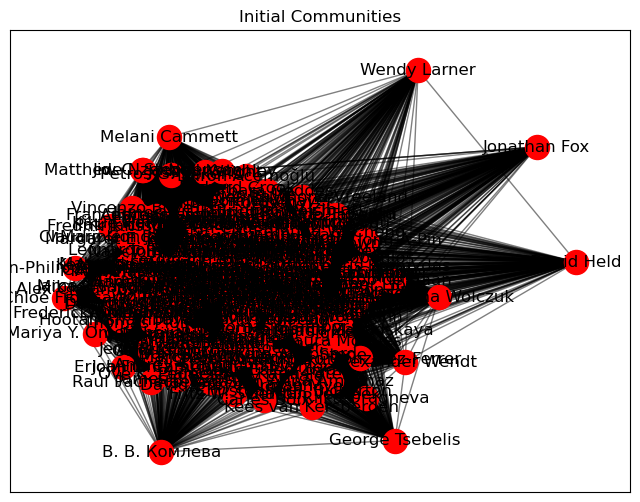

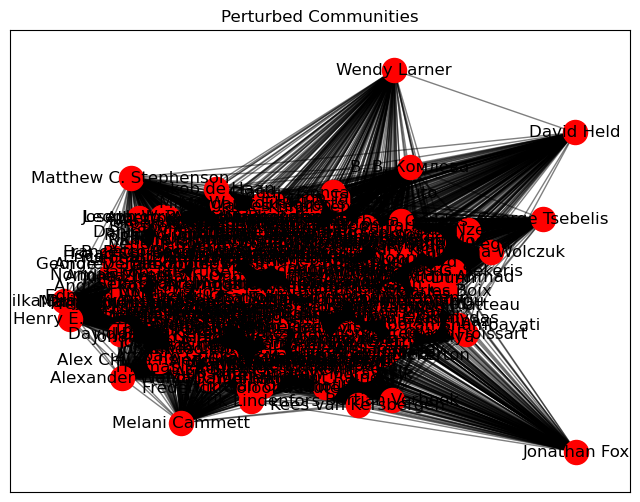

In [165]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities

# Load the adjacency matrix from CSV
df = pd.read_csv("ne_words_adjacency_matrix.csv", index_col=0)

# Create the bipartite graph
B = nx.Graph()
B.add_nodes_from(df.index, bipartite=0)
B.add_nodes_from(df.columns, bipartite=1)
for r, c in np.ndindex(df.shape):
    if df.iat[r, c] != 0:
        B.add_edge(df.index[r], df.columns[c], weight=df.iat[r, c])

# Function to project and detect communities
def project_and_detect_communities(graph, nodes):
    projected = bipartite.weighted_projected_graph(graph, nodes)
    communities = list(greedy_modularity_communities(projected))
    return projected, communities

# Project graph and find communities initially
nodes_set_0 = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
initial_projected, initial_communities = project_and_detect_communities(B, nodes_set_0)

# Function to visualize the graph
def visualize_graph(graph, communities, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    color_map = ['red', 'blue', 'green', 'yellow', 'purple']  # Add more colors if needed
    for count, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=color_map[count % len(color_map)])
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)
    plt.title(title)
    plt.show()

# Visualize initial communities
visualize_graph(initial_projected, initial_communities, 'Initial Communities')

# Simulate perturbations by removing and adding edges
def simulate_perturbations(graph, removal_count, addition_count):
    # Remove edges
    edges_to_remove = random.sample(list(graph.edges()), removal_count)
    graph.remove_edges_from(edges_to_remove)

    # Add edges while maintaining bipartite nature
    possible_new_edges = [(u, v) for u in nodes_set_0 for v in [n for n, d in graph.nodes(data=True) if d['bipartite'] == 1] if not graph.has_edge(u, v)]
    if len(possible_new_edges) > addition_count:
        edges_to_add = random.sample(possible_new_edges, addition_count)
        graph.add_edges_from(edges_to_add)
    else:
        graph.add_edges_from(possible_new_edges)  # Add all possible new edges if fewer than addition_count

simulate_perturbations(B, 10, 10)

# Project graph and find communities after perturbations
perturbed_projected, perturbed_communities = project_and_detect_communities(B, nodes_set_0)

# Visualize perturbed communities
visualize_graph(perturbed_projected, perturbed_communities, 'Perturbed Communities')


### Более пригодная версия

In [169]:
import numpy as np
import networkx as nx
from sknetwork.data import from_edge_list
from sknetwork.clustering import Louvain

# Function to create a NetworkX graph from the sparse matrix
def create_networkx_graph(matrix, words, authors):
    G = nx.Graph()
    for i, author in enumerate(authors):
        for j, word in enumerate(words):
            weight = matrix[i, j]
            if weight > 0:
                G.add_edge(author, word, weight=weight)
    return G

# Assuming 'ne_words_matrix' is a csr_matrix, and 'ne_words', 'authors' are arrays
dense_matrix = ne_words_matrix.toarray()
DG = create_networkx_graph(dense_matrix, ne_words, authors)

# Extract the edge list for sknetwork
edge_list = [(e[0], e[1], e[2]['weight']) for e in DG.edges(data=True)]

# Create the bipartite graph from the edge list using sknetwork
bgraph = from_edge_list(edge_list, bipartite=True)
names = bgraph.names
names_row = bgraph.names_row
names_col = bgraph.names_col
biadjacency = bgraph.biadjacency

# Apply the Louvain clustering algorithm
louvain = Louvain()
labels = louvain.fit_transform(biadjacency)

# Optionally, display the labels to see the clustering result
print(labels)


  (0, 6)	1.0
  (1, 9)	1.0
  (2, 5)	1.0
  (3, 8)	1.0
  (4, 24)	1.0
  (5, 17)	1.0
  (6, 10)	1.0
  (7, 12)	1.0
  (8, 11)	1.0
  (9, 14)	1.0
  (10, 29)	1.0
  (11, 15)	1.0
  (12, 32)	1.0
  (13, 16)	1.0
  (14, 7)	1.0
  (15, 26)	1.0
  (16, 36)	1.0
  (17, 48)	1.0
  (18, 35)	1.0
  (19, 21)	1.0
  (20, 20)	1.0
  (21, 37)	1.0
  (22, 52)	1.0
  (23, 46)	1.0
  (24, 19)	1.0
  :	:
  (421, 1)	0.53125
  (421, 2)	0.125
  (421, 4)	0.09375
  (421, 3)	0.125
  (421, 0)	0.125
  (422, 2)	0.09375
  (422, 3)	0.15625
  (422, 0)	0.15625
  (422, 1)	0.21875
  (422, 4)	0.375
  (423, 2)	0.2
  (423, 3)	0.44
  (423, 1)	0.16
  (423, 4)	0.12
  (423, 0)	0.08
  (424, 0)	0.47368421052631576
  (424, 3)	0.3157894736842105
  (424, 4)	0.05263157894736842
  (424, 2)	0.15789473684210525
  (425, 3)	0.9
  (425, 1)	0.05
  (425, 2)	0.05
  (426, 3)	0.3333333333333333
  (426, 1)	0.5
  (426, 2)	0.16666666666666666


In [172]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Initialize a list to store the labels from each run
all_labels_row = []
all_labels_col = []

# Run Louvain multiple times
for seed in range(100):
    louvain = Louvain(random_state=seed)
    louvain.fit(biadjacency, force_bipartite=True)
    all_labels_row.append(louvain.labels_row_)
    all_labels_col.append(louvain.labels_col_)

# Calculate the average ARI across all pairs of results
n_runs = len(all_labels_row)
ari_scores = []

for i in range(n_runs):
    for j in range(i + 1, n_runs):
        ari_score = adjusted_rand_score(all_labels_row[i], all_labels_row[j])
        ari_scores.append(ari_score)

average_ari = np.mean(ari_scores)
print(f"Average Adjusted Rand Index across runs: {average_ari}")


Average Adjusted Rand Index across runs: 1.0


In [173]:
from sklearn.metrics import adjusted_rand_score

In [174]:
# Function to project, detect communities, and prepare data for ARI calculation
def project_and_detect_communities(graph, nodes):
    projected = bipartite.weighted_projected_graph(graph, nodes)
    communities = list(greedy_modularity_communities(projected))
    # Create a list of labels based on communities
    labels = {}
    for idx, community in enumerate(communities):
        for node in community:
            labels[node] = idx
    return projected, communities, [labels.get(node, -1) for node in projected.nodes()]


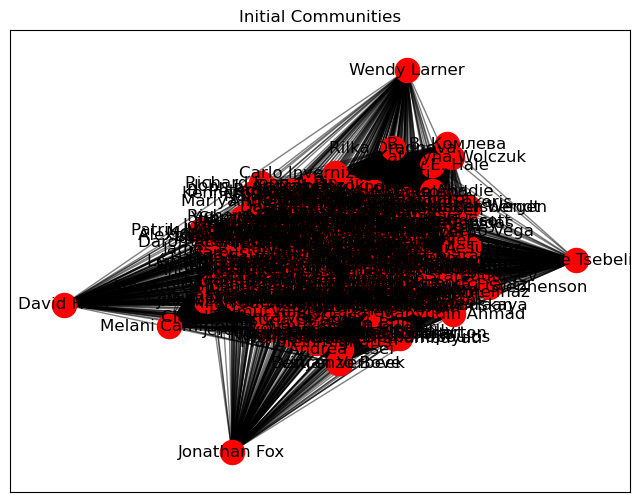

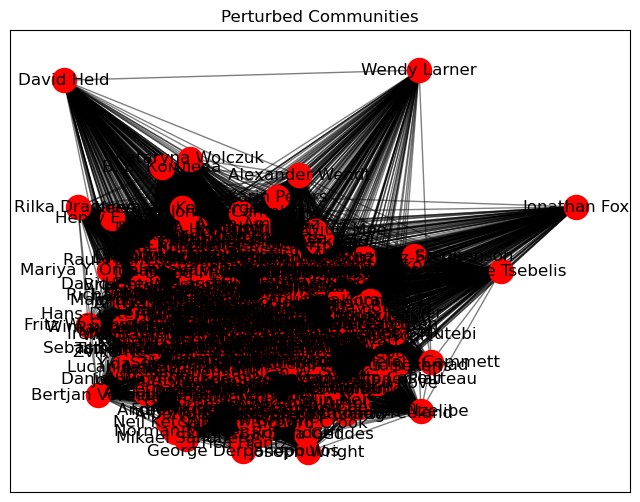

Adjusted Rand Index: 1.0


In [175]:
# Before perturbation
initial_projected, initial_communities, initial_labels = project_and_detect_communities(B, nodes_set_0)
visualize_graph(initial_projected, initial_communities, 'Initial Communities')

# Perturbation is done here
simulate_perturbations(B, 10, 10)

# After perturbation
perturbed_projected, perturbed_communities, perturbed_labels = project_and_detect_communities(B, nodes_set_0)
visualize_graph(perturbed_projected, perturbed_communities, 'Perturbed Communities')

# Calculate and print ARI
ari_score = adjusted_rand_score(initial_labels, perturbed_labels)
print("Adjusted Rand Index:", ari_score)
